## Fetching the dataset

In [1]:
!wget -P /home/wothmag/MyWorkspace/mlzoomcamp-hands-on/dataset/ https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-04 05:49:37--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘/home/wothmag/MyWorkspace/mlzoomcamp-hands-on/dataset/data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.09s   

2023-10-04 05:49:38 (15.9 MB/s) - ‘/home/wothmag/MyWorkspace/mlzoomcamp-hands-on/dataset/data.csv’ saved [1475504/1475504]



## Loading the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../dataset/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preprocessing

In [4]:
df = df.drop(['Engine Fuel Type', 'Driven_Wheels','Number of Doors','Market Category', 'Vehicle Size','Popularity'], axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [8]:
df.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,msrp
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,26.637485,19.733255,4.059474e+04
std,7.579740,109.19187,1.780559,8.863001,8.987798,6.010910e+04
min,1990.000000,55.00000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,354.000000,137.000000,2.065902e+06


In [9]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [10]:
df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [11]:
df = df.fillna(0)

In [12]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

## Feature Engineering

In [13]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,msrp
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
msrp,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


<Axes: >

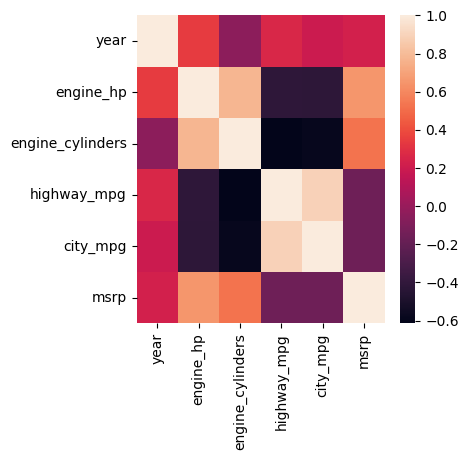

In [14]:
plt.figure(figsize=(4,4))  # Set the size of the heatmap
sns.heatmap(correlation_matrix)

In [15]:
df = df.rename(columns={'msrp' : 'price'})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [16]:
df['above_average'] = (df['price'] > df.price.mean()).astype(int)
df['above_average'].value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [17]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [18]:
price = df['price']
del df['price']

In [19]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, shuffle=True, random_state=42)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
df_train.shape, df_val.shape, df_test.shape

((7148, 10), (2383, 10), (2383, 10))

In [22]:
y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

In [23]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [24]:
df_full_train.above_average.value_counts(normalize=True)

above_average
0    0.723219
1    0.276781
Name: proportion, dtype: float64

In [25]:
global_avg_mean = df_full_train.above_average.mean()
round(global_avg_mean, 2)

0.28

In [26]:
df_full_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [27]:
numeric_df = df_full_train.select_dtypes(include=['number'])
categorical_df = df_full_train.select_dtypes(include=['object'])

In [28]:
categorical_df.nunique()

make                  48
model                902
transmission_type      5
vehicle_style         16
dtype: int64

In [29]:
global_avg_price = df.above_average.mean()
global_avg_price

0.27438307873090484

In [30]:
from IPython.display import display

In [31]:
for c in categorical_df:
    print(c.upper())
    df_group = df_full_train.groupby(c).above_average.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_avg_price
    df_group['price_rate'] = df_group['mean'] / global_avg_price
    display(df_group)
    display(df_group.shape)
    print()

MAKE


,mean,count,diff,price_rate
make,,,,
Acura,0.391089,202,0.116706,1.425340
Alfa Romeo,1.000000,5,0.725617,3.644540
Aston Martin,1.000000,74,0.725617,3.644540
Audi,0.654412,272,0.380029,2.385030
BMW,0.822064,281,0.547681,2.996045
Bentley,1.000000,55,0.725617,3.644540
Bugatti,1.000000,3,0.725617,3.644540
Buick,0.123377,154,-0.151006,0.449651
Cadillac,0.881988,322,0.607604,3.214439


(48, 4)


MODEL


,mean,count,diff,price_rate
model,,,,
1 Series,0.416667,12,0.142284,1.518558
100,0.000000,11,-0.274383,0.000000
124 Spider,0.000000,2,-0.274383,0.000000
190-Class,0.000000,4,-0.274383,0.000000
2,0.000000,10,-0.274383,0.000000
...,...,...,...,...
iQ,0.000000,3,-0.274383,0.000000
tC,0.000000,13,-0.274383,0.000000
xA,0.000000,5,-0.274383,0.000000


(902, 4)


TRANSMISSION_TYPE


,mean,count,diff,price_rate
transmission_type,,,,
AUTOMATED_MANUAL,0.474206,504,0.199823,1.728264
AUTOMATIC,0.310017,6619,0.035634,1.129868
DIRECT_DRIVE,0.458333,48,0.183950,1.670414
MANUAL,0.138652,2344,-0.135731,0.505322
UNKNOWN,0.000000,16,-0.274383,0.000000


(5, 4)


VEHICLE_STYLE


,mean,count,diff,price_rate
vehicle_style,,,,
2dr Hatchback,0.000000,421,-0.274383,0.000000
2dr SUV,0.035398,113,-0.238985,0.129010
4dr Hatchback,0.046099,564,-0.228284,0.168011
4dr SUV,0.374619,1970,0.100236,1.365315
Cargo Minivan,0.000000,60,-0.274383,0.000000
Cargo Van,0.000000,73,-0.274383,0.000000
Convertible,0.555380,632,0.280997,2.024103
Convertible SUV,0.153846,26,-0.120537,0.560698
Coupe,0.496257,935,0.221874,1.808627


(16, 4)

In [32]:
from sklearn.metrics import mutual_info_score

In [33]:
def mutual_info_price_score(series):
    return mutual_info_score(series, df_full_train.above_average)

In [34]:
mutual_info = categorical_df.apply(mutual_info_price_score)
mutual_info.sort_values(ascending=True)

transmission_type    0.020884
vehicle_style        0.083390
make                 0.238724
model                0.460994
dtype: float64

In [35]:
numeric_df.corrwith(numeric_df.above_average)

year                0.318753
engine_hp           0.660670
engine_cylinders    0.453162
highway_mpg        -0.134484
city_mpg           -0.157912
above_average       1.000000
dtype: float64

## Encoding the Categorical features

In [36]:
numerical = df.select_dtypes(include=['number'])
categorical = df.select_dtypes(include=['object'])

In [37]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
df_encoded = ohe.fit_transform(categorical)
feature_names = ohe.get_feature_names_out()
# Convert the sparse matrix to a dense NumPy array
encoded_data_dense = df_encoded

# Create a DataFrame from the one-hot-encoded data with appropriate column names
encoded_df = pd.DataFrame(encoded_data_dense, columns=feature_names)
encoded_df.shape

/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(11914, 984)

In [38]:
df_fin = pd.concat([numerical, encoded_df],axis=1)
df_fin = df_fin.reset_index(drop=True)
df_fin.isna().sum()

year                                0
engine_hp                           0
engine_cylinders                    0
highway_mpg                         0
city_mpg                            0
                                   ..
vehicle_style_Passenger Minivan     0
vehicle_style_Passenger Van         0
vehicle_style_Regular Cab Pickup    0
vehicle_style_Sedan                 0
vehicle_style_Wagon                 0
Length: 990, dtype: int64

## Splitting the Dataset into Train, Validation, Test

In [39]:
from sklearn.model_selection import train_test_split
df_full_train_encoded, df_test_encoded = train_test_split(df_fin, test_size=0.2, shuffle=True, random_state=42)
df_train_encoded, df_val_encoded = train_test_split(df_full_train_encoded, test_size=0.25, shuffle=True, random_state=42)

In [40]:
df_train_encoded = df_train_encoded.reset_index(drop=True)
df_val_encoded = df_val_encoded.reset_index(drop=True)
df_test_encoded = df_test_encoded.reset_index(drop=True)

In [41]:
df_train_encoded.shape, df_val_encoded.shape, df_test_encoded.shape

((7148, 990), (2383, 990), (2383, 990))

In [42]:
df_train_encoded

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,above_average,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,...,vehicle_style_Convertible,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon
0,2011,225.0,6.0,19,15,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009,276.0,6.0,21,17,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012,570.0,10.0,20,12,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,200.0,4.0,27,20,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009,158.0,4.0,26,20,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,2016,266.0,6.0,25,18,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7144,2009,260.0,4.0,29,21,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7145,2012,260.0,6.0,22,17,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7146,1993,136.0,4.0,26,19,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
y_train = df_train_encoded['above_average']
y_val = df_val_encoded['above_average']
y_test = df_test_encoded['above_average']

In [44]:
del df_train_encoded['above_average'], df_val_encoded['above_average'], df_test_encoded['above_average']

In [45]:
X_train = df_train_encoded.copy()
X_val = df_val_encoded.copy()
X_test = df_test_encoded.copy()

## Hypothesis Space - Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [47]:
y_probs = model.predict_proba(X_val)
y_probs

array([[9.98757539e-01, 1.24246064e-03],
       [4.13997334e-03, 9.95860027e-01],
       [9.99823711e-01, 1.76289418e-04],
       ...,
       [9.99553352e-01, 4.46648035e-04],
       [9.51292787e-03, 9.90487072e-01],
       [1.32998288e-02, 9.86700171e-01]])

## Evaluation params

In [48]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_probs[:,1]
df_pred['predicted'] = y_pred
df_pred['actual'] = y_val
df_pred['correct_preds'] = (df_pred['actual'] == df_pred['predicted'])
df_pred

,probability,predicted,actual,correct_preds
0,0.001242,0,0,True
1,0.995860,1,1,True
2,0.000176,0,0,True
3,0.243569,0,0,True
4,0.001597,0,0,True
...,...,...,...,...
2378,0.002400,0,0,True
2379,0.001821,0,0,True
2380,0.000447,0,0,True
2381,0.990487,1,1,True


In [49]:
acc = df_pred['correct_preds'].mean()
print(f'Accuracy : {acc}')

Accuracy : 0.9471254720939991


# Effects on model accuracy by Feature elimination technique

## Feature - Year

In [50]:
X_train = df_train_encoded.copy()
X_val = df_val_encoded.copy()
X_test = df_test_encoded.copy()

X_train = X_train.drop(['year'], axis=1)
X_val = X_val.drop(['year'], axis=1)
X_test = X_test.drop(['year'], axis=1)

In [51]:
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [52]:
df_accuracy = pd.DataFrame(columns=['Model', 'Accuracy', 'Accuracy_diff'])
model1_data = {'Model': 'Model w/o year', 'Accuracy': round((y_val == y_pred).mean(), 4), 'Accuracy_diff': round(acc - round((y_val == y_pred).mean(), 4), 4)}
df_accuracy = pd.concat([df_accuracy, pd.DataFrame([model1_data])], ignore_index=True)

/tmp/ipykernel_563668/1338342409.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_accuracy = pd.concat([df_accuracy, pd.DataFrame([model1_data])], ignore_index=True)


In [53]:
df_accuracy

,Model,Accuracy,Accuracy_diff
0,Model w/o year,0.948,-0.0009


## Feature - engine_hp

In [54]:
X_train = df_train_encoded.copy()
X_val = df_val_encoded.copy()
X_test = df_test_encoded.copy()

X_train = X_train.drop(['engine_hp'], axis=1)
X_val = X_val.drop(['engine_hp'], axis=1)
X_test = X_test.drop(['engine_hp'], axis=1)

In [55]:
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [56]:
model2_data = {'Model': 'Model w/o engine_hp', 'Accuracy': round((y_val == y_pred).mean(), 4), 'Accuracy_diff':round(acc - round((y_val == y_pred).mean(), 4), 4)}
df_accuracy = pd.concat([df_accuracy, pd.DataFrame([model2_data])], ignore_index=True)

In [57]:
df_accuracy

,Model,Accuracy,Accuracy_diff
0,Model w/o year,0.9480,-0.0009
1,Model w/o engine_hp,0.9266,0.0205


## Feature - transmission_type

In [58]:
X_train = df_train_encoded.copy()
X_val = df_val_encoded.copy()
X_test = df_test_encoded.copy()

X_train = X_train.drop(['transmission_type_AUTOMATED_MANUAL','transmission_type_AUTOMATIC','transmission_type_DIRECT_DRIVE','transmission_type_MANUAL','transmission_type_UNKNOWN'], axis=1)
X_val = X_val.drop(['transmission_type_AUTOMATED_MANUAL','transmission_type_AUTOMATIC','transmission_type_DIRECT_DRIVE','transmission_type_MANUAL','transmission_type_UNKNOWN'], axis=1)
X_test = X_test.drop(['transmission_type_AUTOMATED_MANUAL','transmission_type_AUTOMATIC','transmission_type_DIRECT_DRIVE','transmission_type_MANUAL','transmission_type_UNKNOWN'], axis=1)

In [59]:
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [60]:
model3_data = {'Model': 'Model w/o transmission_type', 'Accuracy': round((y_val == y_pred).mean(), 4), 'Accuracy_diff': round(acc - round((y_val == y_pred).mean(), 4), 4)}
df_accuracy = pd.concat([df_accuracy, pd.DataFrame([model3_data])], ignore_index=True)
df_accuracy

,Model,Accuracy,Accuracy_diff
0,Model w/o year,0.9480,-0.0009
1,Model w/o engine_hp,0.9266,0.0205
2,Model w/o transmission_type,0.9454,0.0017


## Feature - city_mpg

In [61]:
X_train = df_train_encoded.copy()
X_val = df_val_encoded.copy()
X_test = df_test_encoded.copy()

X_train = X_train.drop(['city_mpg'], axis=1)
X_val = X_val.drop(['city_mpg'], axis=1)
X_test = X_test.drop(['city_mpg'], axis=1)

In [62]:
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [63]:
model4_data = {'Model': 'Model w/o city_mpg', 'Accuracy': round((y_val == y_pred).mean(), 4), 'Accuracy_diff':round(acc - round((y_val == y_pred).mean(), 4), 4)}
df_accuracy = pd.concat([df_accuracy, pd.DataFrame([model4_data])], ignore_index=True)
df_accuracy

,Model,Accuracy,Accuracy_diff
0,Model w/o year,0.9480,-0.0009
1,Model w/o engine_hp,0.9266,0.0205
2,Model w/o transmission_type,0.9454,0.0017
3,Model w/o city_mpg,0.9324,0.0147


# Using Linear Regression to predict the price of the Car

In [64]:
data = pd.concat([df_fin, price], axis=1)
data = data.drop(['above_average'],axis=1)
data.columns

Index(['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'make_Acura', 'make_Alfa Romeo', 'make_Aston Martin', 'make_Audi',
       'make_BMW',
       ...
       'vehicle_style_Convertible SUV', 'vehicle_style_Coupe',
       'vehicle_style_Crew Cab Pickup', 'vehicle_style_Extended Cab Pickup',
       'vehicle_style_Passenger Minivan', 'vehicle_style_Passenger Van',
       'vehicle_style_Regular Cab Pickup', 'vehicle_style_Sedan',
       'vehicle_style_Wagon', 'price'],
      dtype='object', length=990)

## EDA on target feature

/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


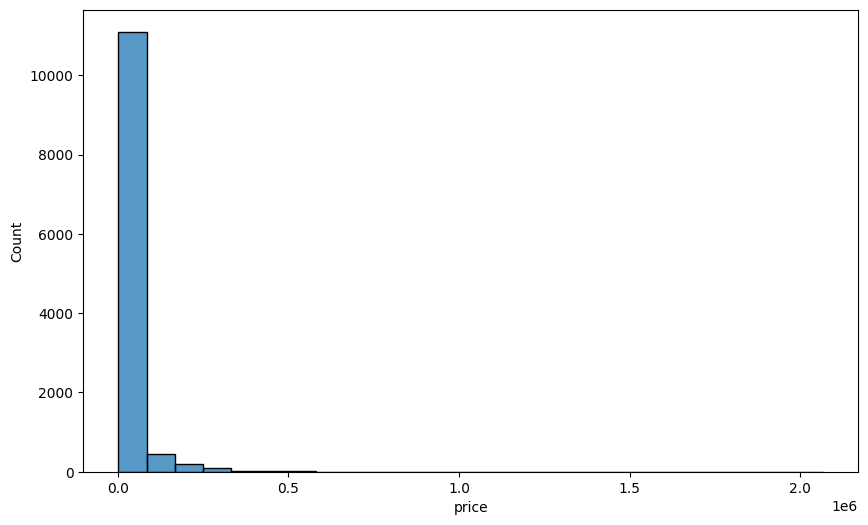

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(x='price', data=data, bins=25)
plt.show()

In [66]:
data['car_cost'] = np.log1p(data['price'])
data = data.drop(['price'], axis=1)
data

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,...,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon,car_cost
0,2011,335.0,6.0,26,19,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.739349
1,2011,300.0,6.0,28,19,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.612779
2,2011,300.0,6.0,28,20,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.500977
3,2011,230.0,6.0,28,18,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.290483
4,2011,230.0,6.0,28,18,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.448744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.739024
11910,2012,300.0,6.0,23,16,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.945018
11911,2012,300.0,6.0,23,16,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.832122
11912,2013,300.0,6.0,23,16,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.838031


/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


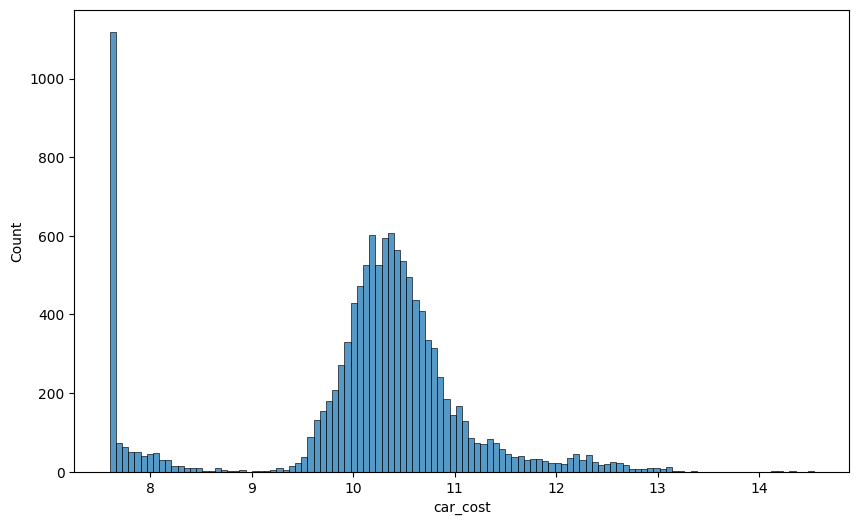

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(x='car_cost', data=data)
plt.show()

## Splitting the dataset into Train, Validation, Test

In [68]:
from sklearn.model_selection import train_test_split
df_full_train_encoded, df_test_encoded = train_test_split(data, test_size=0.2, shuffle=True, random_state=42)
df_train_encoded, df_val_encoded = train_test_split(df_full_train_encoded, test_size=0.25, shuffle=True, random_state=42)

In [69]:
df_train_encoded = df_train_encoded.reset_index(drop=True)
df_val_encoded = df_val_encoded.reset_index(drop=True)
df_test_encoded = df_test_encoded.reset_index(drop=True)

In [70]:
df_train_encoded.shape, df_val_encoded.shape, df_test_encoded.shape

((7148, 990), (2383, 990), (2383, 990))

In [71]:
df_train_encoded

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,...,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon,car_cost
0,2011,225.0,6.0,19,15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.422281
1,2009,276.0,6.0,21,17,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.175269
2,2012,570.0,10.0,20,12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.421188
3,2016,200.0,4.0,27,20,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.126271
4,2009,158.0,4.0,26,20,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.927009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,2016,266.0,6.0,25,18,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.536248
7144,2009,260.0,4.0,29,21,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.132056
7145,2012,260.0,6.0,22,17,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.252241
7146,1993,136.0,4.0,26,19,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.601402


In [72]:
y_train = df_train_encoded['car_cost']
y_val = df_val_encoded['car_cost']
y_test = df_test_encoded['car_cost']

In [73]:
del df_train_encoded['car_cost'], df_val_encoded['car_cost'], df_test_encoded['car_cost']

In [74]:
X_train = df_train_encoded.copy()
X_val = df_val_encoded.copy()
X_test = df_test_encoded.copy()

In [75]:
def rmse(y_true, y_pred):
    err = (y_pred - y_true)**2
    mse = np.mean(err)
    return np.sqrt(mse)

In [76]:
rmse_metrics = pd.DataFrame(columns=['Alpha', 'RMSE'])


## Hypothesis Space - Ridge Regression with different alpha values

In [77]:
from sklearn.linear_model import Ridge
alpha = [0, 0.01, 0.1, 1, 10]
for i in alpha:
    rr = Ridge(alpha=i, solver='sag', random_state=42)
    rr.fit(X_train, y_train)
    y_pred = rr.predict(X_val)
    error = rmse(y_val, y_pred)
    model_data = {'Alpha': {i}, 'RMSE': {round(error, 3)}}
    rmse_metrics = pd.concat([rmse_metrics, pd.DataFrame([model_data])], ignore_index=True)

/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wothmag/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Evaluation params

In [78]:
rmse_metrics

,Alpha,RMSE
0,{0},{0.487}
1,{0.01},{0.487}
2,{0.1},{0.487}
3,{1},{0.487}
4,{10},{0.487}
